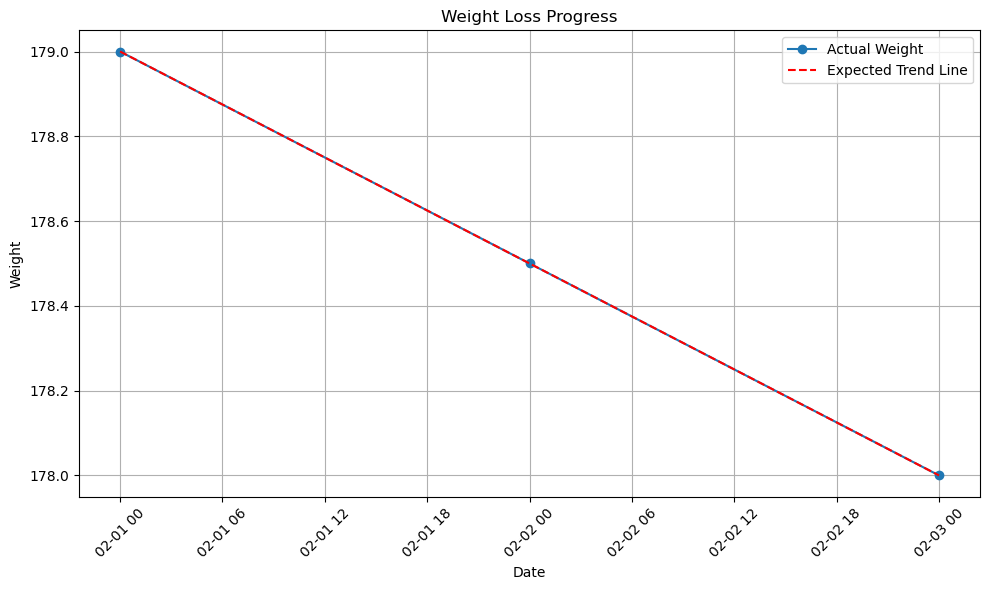

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

class WeightTracker:
    def __init__(self, initial_weight):
        self.initial_weight = initial_weight
        self.data = {'Date': [], 'Calories_Intake': [], 'Calories_Burned': [], 'Weight': []}

    def add_entry(self, date, calories_intake, calories_burned, weight):
        self.data['Date'].append(date)
        self.data['Calories_Intake'].append(calories_intake)
        self.data['Calories_Burned'].append(calories_burned)
        self.data['Weight'].append(weight)

    def plot_progress(self):
        df = pd.DataFrame(self.data)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date')

        x = np.array(range(len(df)))
        y = df['Weight']

        model = LinearRegression().fit(x.reshape(-1, 1), y)
        trend_line = model.predict(x.reshape(-1, 1))

        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df['Weight'], marker='o', label='Actual Weight')
        plt.plot(df['Date'], trend_line, linestyle='--', color='red', label='Expected Trend Line')
        plt.xlabel('Date')
        plt.ylabel('Weight')
        plt.title('Weight Loss Progress')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()




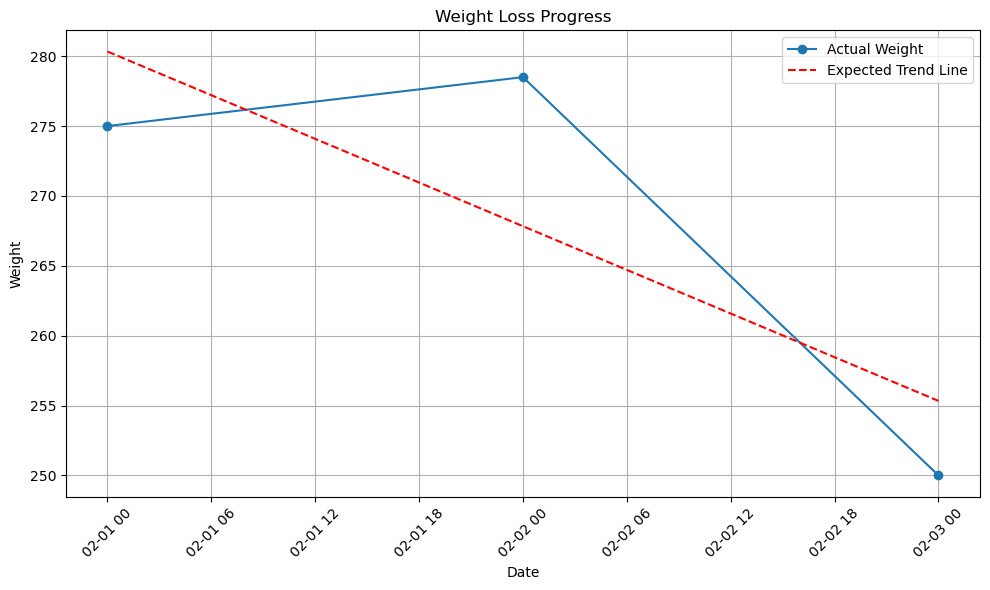

In [5]:
# Example usage:
weight_tracker = WeightTracker(initial_weight=280)  # Initial weight in pounds
weight_tracker.add_entry('2024-02-01', 2500, 500, 275)
weight_tracker.add_entry('2024-02-02', 2000, 600, 278.5)
weight_tracker.add_entry('2024-02-03', 2200, 550, 250)
weight_tracker.plot_progress()

AttributeError: 'Series' object has no attribute 'append'

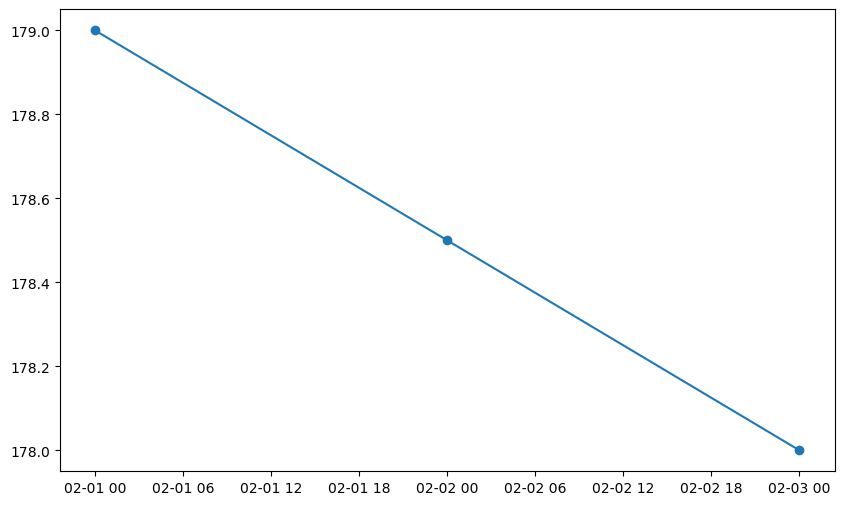

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

class WeightTracker:
    def __init__(self, initial_weight):
        self.initial_weight = initial_weight
        self.data = {'Date': [], 'Calories_Intake': [], 'Calories_Burned': [], 'Weight': []}

    def add_entry(self, date, calories_intake, calories_burned, weight):
        self.data['Date'].append(date)
        self.data['Calories_Intake'].append(calories_intake)
        self.data['Calories_Burned'].append(calories_burned)
        self.data['Weight'].append(weight)

    def plot_progress(self, goal_weight=None, goal_date=None):
        df = pd.DataFrame(self.data)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date')

        x = np.array(range(len(df)))
        y = df['Weight']

        model = LinearRegression().fit(x.reshape(-1, 1), y)
        trend_line = model.predict(x.reshape(-1, 1))

        # Extend trend line to the goal date if provided
        if goal_weight and goal_date:
            days_to_goal = (pd.to_datetime(goal_date) - df['Date'].iloc[-1]).days
            expected_trend_line = np.linspace(trend_line[-1], goal_weight, days_to_goal)
            trend_line = np.concatenate((trend_line, expected_trend_line))

        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df['Weight'], marker='o', label='Actual Weight')
        plt.plot(df['Date'].append(pd.date_range(start=df['Date'].iloc[-1], periods=days_to_goal+1, freq='D')[1:]),
                 trend_line, linestyle='--', color='red', label='Expected Trend Line')
        plt.xlabel('Date')
        plt.ylabel('Weight')
        plt.title('Weight Loss Progress')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Example usage:
weight_tracker = WeightTracker(initial_weight=180)  # Initial weight in pounds
weight_tracker.add_entry('2024-02-01', 2500, 500, 179)
weight_tracker.add_entry('2024-02-02', 2000, 600, 178.5)
weight_tracker.add_entry('2024-02-03', 2200, 550, 178)
# Set goal weight and goal date
goal_weight = 170
goal_date = '2024-03-15'
weight_tracker.plot_progress(goal_weight=goal_weight, goal_date=goal_date)


ValueError: x and y must have same first dimension, but have shapes (44,) and (3,)

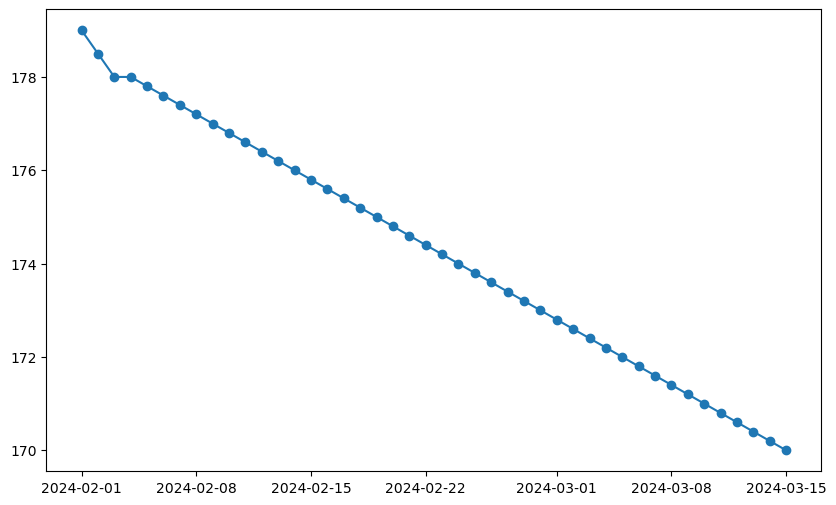

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

class WeightTracker:
    def __init__(self, initial_weight):
        self.initial_weight = initial_weight
        self.data = {'Date': [], 'Calories_Intake': [], 'Calories_Burned': [], 'Weight': []}

    def add_entry(self, date, calories_intake, calories_burned, weight):
        self.data['Date'].append(date)
        self.data['Calories_Intake'].append(calories_intake)
        self.data['Calories_Burned'].append(calories_burned)
        self.data['Weight'].append(weight)

    def plot_progress(self, goal_weight=None, goal_date=None):
        df = pd.DataFrame(self.data)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date')

        x = np.array(range(len(df)))
        y = df['Weight']

        model = LinearRegression().fit(x.reshape(-1, 1), y)
        trend_line = model.predict(x.reshape(-1, 1))

        # Extend trend line to the goal date if provided
        if goal_weight and goal_date:
            days_to_goal = (pd.to_datetime(goal_date) - df['Date'].iloc[-1]).days
            extended_dates = pd.date_range(start=df['Date'].iloc[-1], periods=days_to_goal + 1, freq='D')[1:]
            extended_trend_line = np.linspace(trend_line[-1], goal_weight, days_to_goal)
            df_extension = pd.DataFrame({'Date': extended_dates, 'Weight': extended_trend_line})
            df = pd.concat([df, df_extension])

        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df['Weight'], marker='o', label='Actual Weight')
        plt.plot(df['Date'], trend_line, linestyle='--', color='red', label='Expected Trend Line')
        plt.xlabel('Date')
        plt.ylabel('Weight')
        plt.title('Weight Loss Progress')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Example usage:
weight_tracker = WeightTracker(initial_weight=180)  # Initial weight in pounds
weight_tracker.add_entry('2024-02-01', 2500, 500, 179)
weight_tracker.add_entry('2024-02-02', 2000, 600, 178.5)
weight_tracker.add_entry('2024-02-03', 2200, 550, 178)
# Set goal weight and goal date
goal_weight = 170
goal_date = '2024-03-15'
weight_tracker.plot_progress(goal_weight=goal_weight, goal_date=goal_date)


ValueError: x and y must have same first dimension, but have shapes (44,) and (3,)

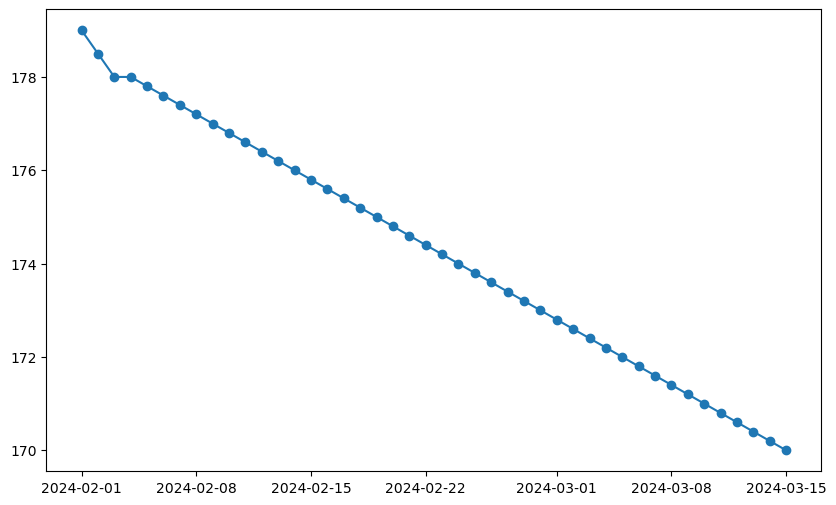

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

class WeightTracker:
    def __init__(self, initial_weight):
        self.initial_weight = initial_weight
        self.data = {'Date': [], 'Calories_Intake': [], 'Calories_Burned': [], 'Weight': []}

    def add_entry(self, date, calories_intake, calories_burned, weight):
        self.data['Date'].append(date)
        self.data['Calories_Intake'].append(calories_intake)
        self.data['Calories_Burned'].append(calories_burned)
        self.data['Weight'].append(weight)

    def plot_progress(self, goal_weight=None, goal_date=None):
        df = pd.DataFrame(self.data)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date')

        x = np.array(range(len(df)))
        y = df['Weight']

        model = LinearRegression().fit(x.reshape(-1, 1), y)
        trend_line = model.predict(x.reshape(-1, 1))

        # Extend trend line to the goal date if provided
        if goal_weight and goal_date:
            days_to_goal = (pd.to_datetime(goal_date) - df['Date'].iloc[-1]).days
            extended_dates = pd.date_range(start=df['Date'].iloc[-1], periods=days_to_goal + 1, freq='D')[1:]
            extended_x = np.arange(len(df), len(df) + days_to_goal)
            extended_trend_line = np.linspace(trend_line[-1], goal_weight, days_to_goal)
            df_extension = pd.DataFrame({'Date': extended_dates, 'Weight': extended_trend_line})
            df_extension.index = extended_x
            df = pd.concat([df, df_extension])

        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df['Weight'], marker='o', label='Actual Weight')
        plt.plot(df['Date'], trend_line, linestyle='--', color='red', label='Expected Trend Line')
        plt.xlabel('Date')
        plt.ylabel('Weight')
        plt.title('Weight Loss Progress')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Example usage:
weight_tracker = WeightTracker(initial_weight=180)  # Initial weight in pounds
weight_tracker.add_entry('2024-02-01', 2500, 500, 179)
weight_tracker.add_entry('2024-02-02', 2000, 600, 178.5)
weight_tracker.add_entry('2024-02-03', 2200, 550, 178)
# Set goal weight and goal date
goal_weight = 170
goal_date = '2024-03-15'
weight_tracker.plot_progress(goal_weight=goal_weight, goal_date=goal_date)
